In [1]:
library(here)
setwd(here())
print(getwd())
source(file="misc_functions.R")
source(file="experiments/learning_curve/learning_curve.R")
source(file="experiments/titanic_challenge/1_feature_engineering.R")

library(lattice)
library(gridExtra)
library(mice)
library(ggplot2)

library(randomForest)
library(e1071)
library(xgboost)

here() starts at /home/sapristi/Documents/ML


[1] "/home/sapristi/Documents/ML"


Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units


Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:gridExtra’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin


Attaching package: ‘e1071’

The following object is masked from ‘package:Hmisc’:

    impute



In [3]:
test.raw <- read.csv("datasets/titanic_na/test.csv", 
                      colClasses = c("Sex" = "factor", "Embarked" = "factor"))

train.raw <- read.csv("datasets/titanic_na/train.csv", 
                      colClasses = c("Survived" = "factor", "Sex" = "factor", "Embarked" = "factor"))

train.to_complete <- fe$forge_features_add(train.raw, more_tickets = test.raw$Ticket)

library(mice)
imp <-  mice(train.to_complete, m=5,  printFlag = FALSE, formulas = list(Age = Age ~ Title, Age.simple = Age.simple ~ Title, 
                                                                         Fare = Fare ~ Pclass, Fare.log = Fare.log ~ Pclass))
train <- complete(imp, 1)

#print(summary(train))

In [4]:
make_learning_curves <- function(model_funs, predict_funs, train, test, target, features, steps, variations, limit=NULL, title = NULL) {
    plot <- NULL
    for (model in names(model_funs)) {
        model_fun <- model_funs[[model]]
        predict_fun <- predict_funs[[model]]
        plot <- learning_curve$plot.advanced(train, test, target, features, model_fun, predict_fun, 
                                             steps, limit = limit, variations = variations, title = model, previous_plot = plot)
    }
    complete_title = paste(title, variations, "variations")
    plot <- learning_curve$make_decor(plot, complete_title, ymin=0.5)
    return(plot)
}

In [5]:


svm.linear.model_fun  <- function(train, target, features) {
    formula <- paste(target, paste(features, collapse = "+"), sep="~")  
    return(svm(as.formula(formula), 
             data = train, kernel="linear", cost=50, coef0=1,
             type="C-classification"))
}

svm.poly.model_fun  <- function(train, target, features) {
    formula <- paste(target, paste(features, collapse = "+"), sep="~")  
    return(svm(as.formula(formula), 
             data = train, kernel="polynomial", degree=3, cost=50, coef0=1,
             type="C-classification"))
}

rf.model_fun <- function(train, target, features) {
    formula <- paste(target, paste(features, collapse = "+"), sep="~")  
    randomForest(as.formula(formula), 
               data = train, na.action = na.roughfix)
}

xgb.model_fun <- function(train, target, features) {
  train.data <-  data.matrix(train[,  features])
#  print(summary(as.numeric(train[[target]])-1))
    label = as.numeric(train[[target]])-1
  xgboost(data = train.data, label = label, nrounds = 50, verbose = 0,
          objective = "binary:logistic",eval.metric = "logloss")
}

xgb.predict_fun  <- function(model, data, target, features) {
  test.data <-  data.matrix(data[,  features])
  learning_curve$discretize(predict(model, as.matrix(test.data)))
  }



In [39]:

source(file="experiments/learning_curve/learning_curve.R")
features_list <- list(
    c("Pclass","Fare.log", "Age.simple", "Sex"),
    c("Pclass","Fare.log", "Age.simple", "Title"),
    c("Pclass","Age", "Fare", "Title"),
    c("Pclass","Age", "Fare", "Sex"),
    c("Pclass","Age", "Fare", "Title", "Sex", "Parch", "SibSp"),
    c("Pclass","Fare.log", "Age.simple","Title", "Sex", "Parch", "SibSp")
    )
    
    


model_funs <- list( xgb = xgb.model_fun, rf = rf.model_fun)

predict_funs <- list(xgb = xgb.predict_fun)

i <- 1
plots <- list()
for (features in features_list) {
    title = paste(features, collapse=" ")
    
    
    p <- make_learning_curves(model_funs, predict_funs=predict_funs, train=train, test=0.1, target="Survived",  features=features, 
                          steps=10, variations = 10, title = title)
    p <- learning_curve$make_decor(p, ymin=0.7)
    plots[[i]] <- p
    i <- i+1
}


[1] "891 rows, 89 for training"
[1] "891 rows, 89 for training"


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


[1] "891 rows, 89 for training"
[1] "891 rows, 89 for training"


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


[1] "891 rows, 89 for training"
[1] "891 rows, 89 for training"


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


[1] "891 rows, 89 for training"
[1] "891 rows, 89 for training"


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


[1] "891 rows, 89 for training"
[1] "891 rows, 89 for training"


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


[1] "891 rows, 89 for training"
[1] "891 rows, 89 for training"


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


Warning message:
“Removed 1 rows containing non-finite values (stat_summary_bin).”Warning message:
“Removed 1 rows containing non-finite values (stat_summary_bin).”Warning message:
“Removed 5 rows containing non-finite values (stat_summary_bin).”Warning message:
“Removed 5 rows containing non-finite values (stat_summary_bin).”Warning message:
“Removed 6 rows containing non-finite values (stat_summary_bin).”Warning message:
“Removed 6 rows containing non-finite values (stat_summary_bin).”Warning message:
“Removed 1 rows containing non-finite values (stat_summary_bin).”Warning message:
“Removed 1 rows containing non-finite values (stat_summary_bin).”Warning message:
“Removed 9 rows containing non-finite values (stat_summary_bin).”Warning message:
“Removed 9 rows containing non-finite values (stat_summary_bin).”Warning message:
“Removed 4 rows containing non-finite values (stat_summary_bin).”Warning message:
“Removed 4 rows containing non-finite values (stat_summary_bin).”Warning message:

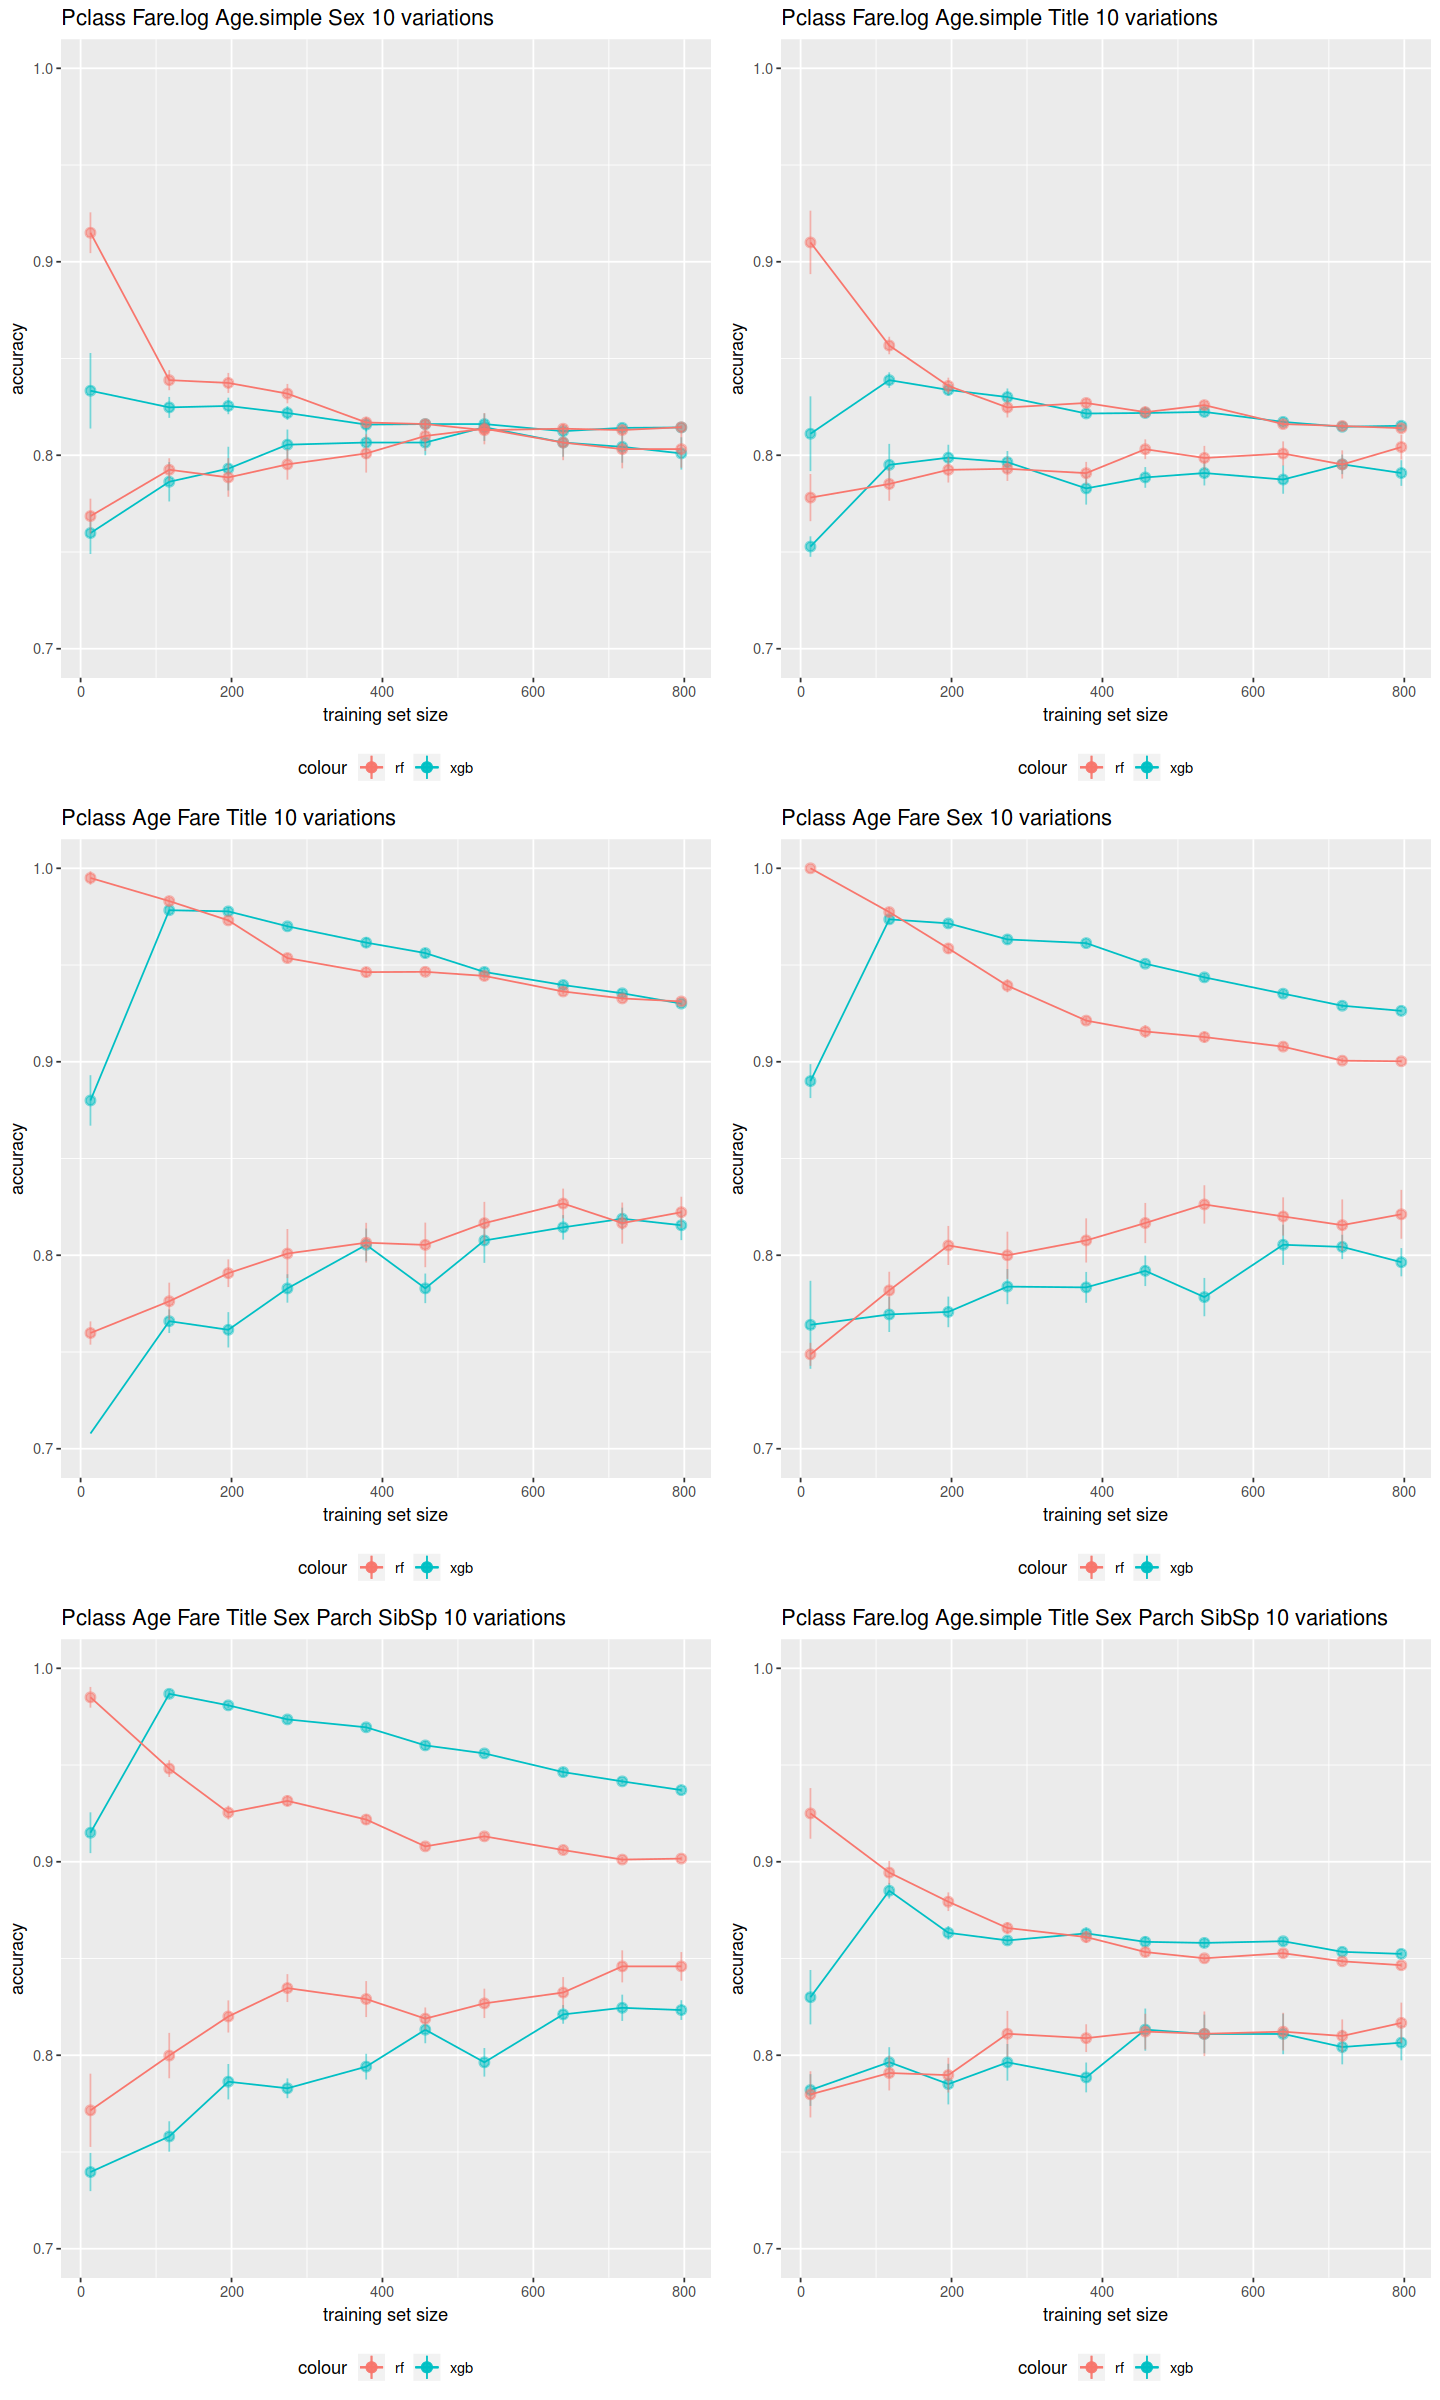

In [43]:
options(repr.plot.height= 20,repr.plot.width= 12)
grid.arrange(grobs = plots, nrow = 3)